# Dataset Vizualization

## Imports

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../utils')
from UCSF_Dataset import UCSF_Dataset
from Transforms import train_transform, val_transform

## Load Dataset

In [2]:
# Load Subjects Information
train_df = pd.read_csv('../data/TRAIN.csv')
val_df = pd.read_csv('../data/VAL.csv')
test_df = pd.read_csv('../data/TEST.csv')

train_df.head()

,SubjectID,Sex,CancerType,ScannerType,In-plane voxel size (mm),Matrix size,Prior Craniotomy/Biopsy/Resection,Age,Scanner Strength (Tesla),Slice Thickness (mm),...,S-VMin,S-VMean,S-VStd,S-VDiff,T1pre,FLAIR,T1post,T2Synth,Seg,BraTS-seg
0,100381A,Male,Lung,GE 1.5 T Signa HDxt,0.86x0.86,256x256x126,No,71.0,1.5,1.5,...,77.549672,770.511385,974.806455,4.146686e-05,../data/raw/UCSF_BrainMetastases_TRAIN/100381A...,../data/raw/UCSF_BrainMetastases_TRAIN/100381A...,../data/raw/UCSF_BrainMetastases_TRAIN/100381A...,../data/raw/UCSF_BrainMetastases_TRAIN/100381A...,../data/raw/UCSF_BrainMetastases_TRAIN/100381A...,../data/raw/UCSF_BrainMetastases_TRAIN/100381A...
1,100414B,Female,Breast,GE 1.5 T Signa HDxt,0.59x0.59,512x512x50,No,52.0,1.5,3.0,...,11.328201,16.889317,3.940386,3.629621e-06,../data/raw/UCSF_BrainMetastases_TRAIN/100414B...,../data/raw/UCSF_BrainMetastases_TRAIN/100414B...,../data/raw/UCSF_BrainMetastases_TRAIN/100414B...,../data/raw/UCSF_BrainMetastases_TRAIN/100414B...,../data/raw/UCSF_BrainMetastases_TRAIN/100414B...,../data/raw/UCSF_BrainMetastases_TRAIN/100414B...
2,100132B,Male,Lung,GE 1.5 T Signa HDxt,0.5x0.5,512x512x156,No,55.0,1.5,1.2,...,81.300003,146.880006,64.989060,1.136868e-13,../data/raw/UCSF_BrainMetastases_TRAIN/100132B...,../data/raw/UCSF_BrainMetastases_TRAIN/100132B...,../data/raw/UCSF_BrainMetastases_TRAIN/100132B...,../data/raw/UCSF_BrainMetastases_TRAIN/100132B...,../data/raw/UCSF_BrainMetastases_TRAIN/100132B...,../data/raw/UCSF_BrainMetastases_TRAIN/100132B...
3,100212A,Female,Lung,GE 1.5 T Signa HDxt,1.17x1.17,256x256x98,No,52.0,1.5,1.5,...,16.480196,23.118053,7.876000,3.481233e-06,../data/raw/UCSF_BrainMetastases_TRAIN/100212A...,../data/raw/UCSF_BrainMetastases_TRAIN/100212A...,../data/raw/UCSF_BrainMetastases_TRAIN/100212A...,../data/raw/UCSF_BrainMetastases_TRAIN/100212A...,../data/raw/UCSF_BrainMetastases_TRAIN/100212A...,../data/raw/UCSF_BrainMetastases_TRAIN/100212A...
4,100243B,Female,Breast,GE 1.5 T Signa HDxt,0.86x0.86,256x256x100,No,55.0,1.5,1.5,...,8.862820,86.227850,52.711028,6.960829e-06,../data/raw/UCSF_BrainMetastases_TRAIN/100243B...,../data/raw/UCSF_BrainMetastases_TRAIN/100243B...,../data/raw/UCSF_BrainMetastases_TRAIN/100243B...,../data/raw/UCSF_BrainMetastases_TRAIN/100243B...,../data/raw/UCSF_BrainMetastases_TRAIN/100243B...,../data/raw/UCSF_BrainMetastases_TRAIN/100243B...


In [3]:
# Number of subject
size = 3

# Train Dataset
train_images = [train_df['T1pre'], train_df['FLAIR'], train_df['T1post'], train_df['T2Synth']]
train_labels = train_df['BraTS-seg']
train_dataset = UCSF_Dataset(train_images, train_labels, train_transform, size)

# Validation Dataset
val_images = [val_df['T1pre'], val_df['FLAIR'], val_df['T1post'], val_df['T2Synth']]
val_labels = val_df['BraTS-seg']
val_dataset = UCSF_Dataset(val_images, val_labels, val_transform, size)

## Visualize Dataset

torch.Size([4, 220, 220, 144])


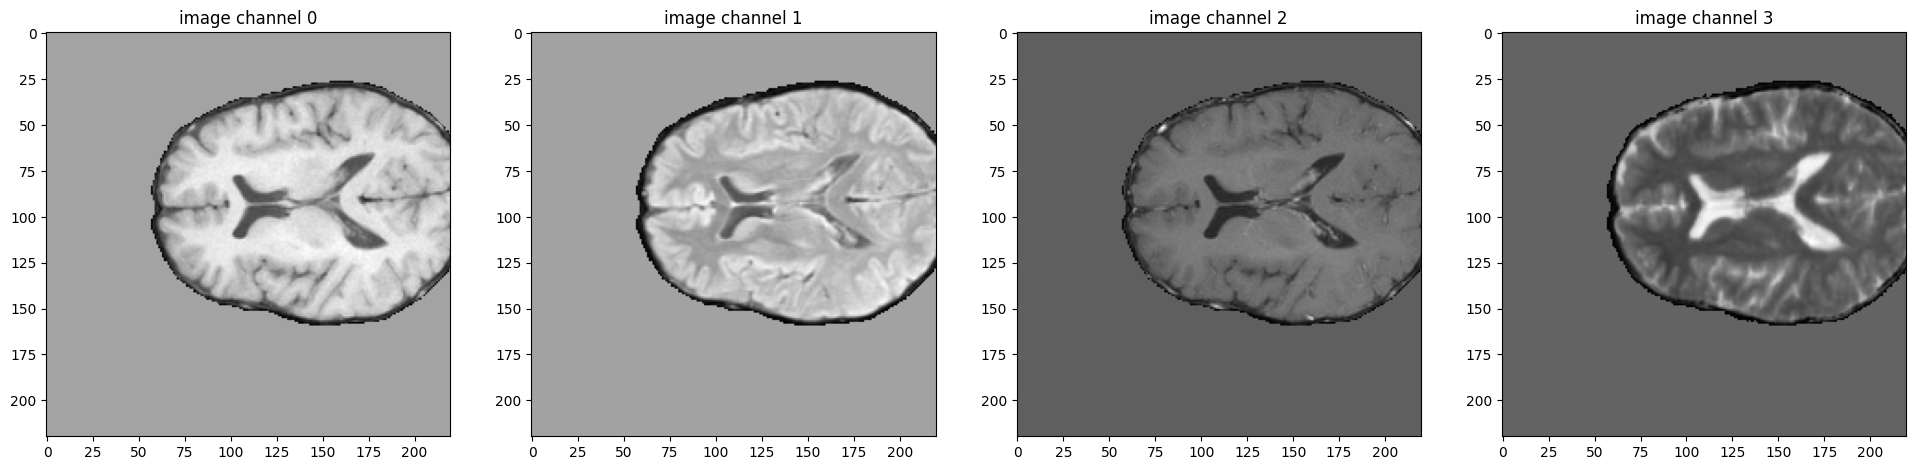

torch.Size([3, 220, 220, 144])


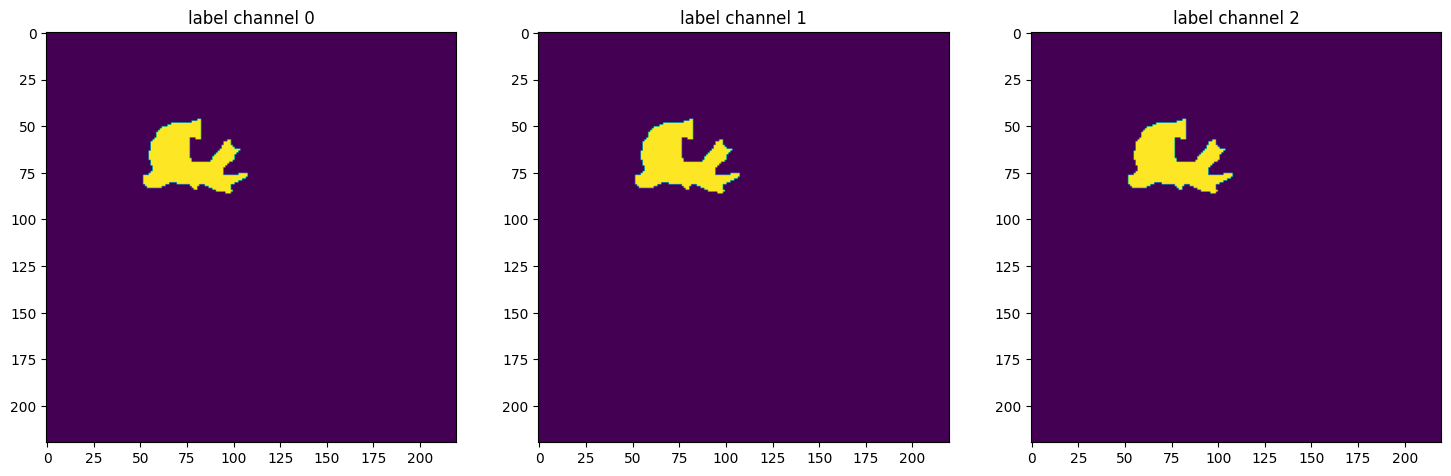

In [4]:
# Image
data = train_dataset[1]['image']
print(data.shape)
plt.figure("image", (24, 6))
for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.title(f"image channel {i}")
        plt.imshow(data[i, :, :, 70].detach().cpu(), cmap="gray")
plt.show()

# Label
label = train_dataset[0]['label']
print(label.shape)
plt.figure("label", (18, 6))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.title(f"label channel {i}")
    plt.imshow(label[i, :, :, 70].detach().cpu())
plt.show()

torch.Size([4, 240, 240, 164])


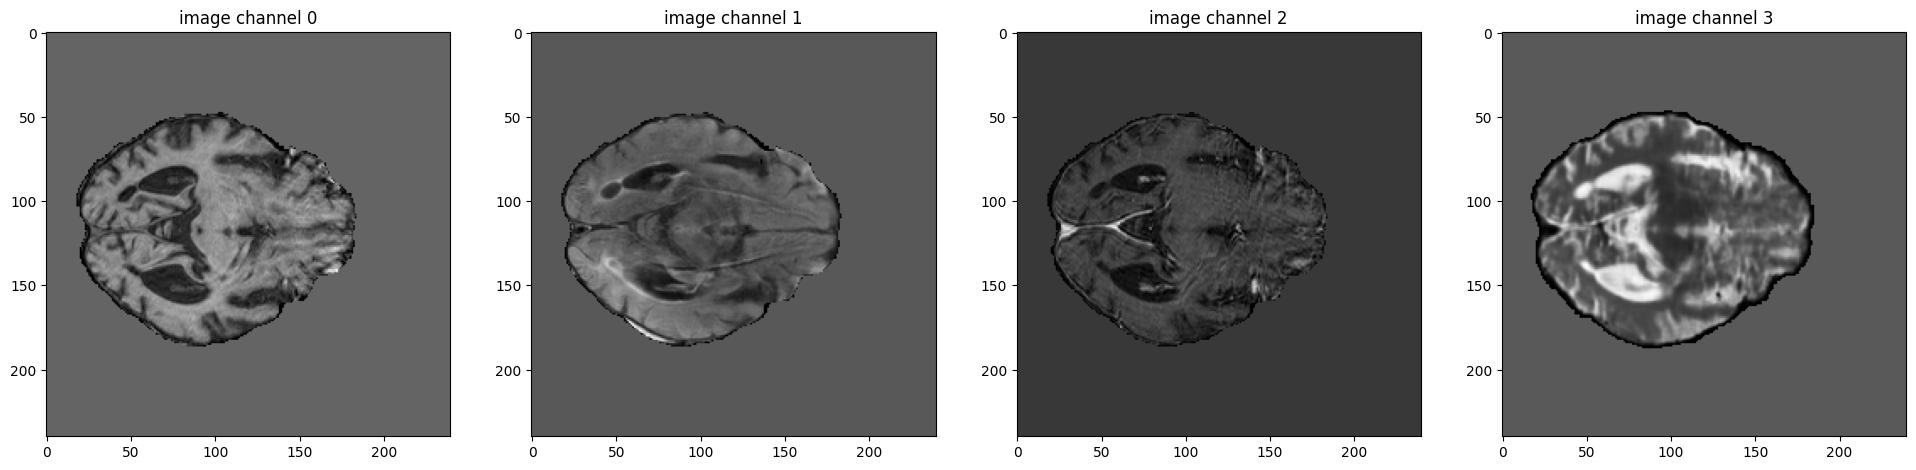

torch.Size([3, 240, 240, 164])


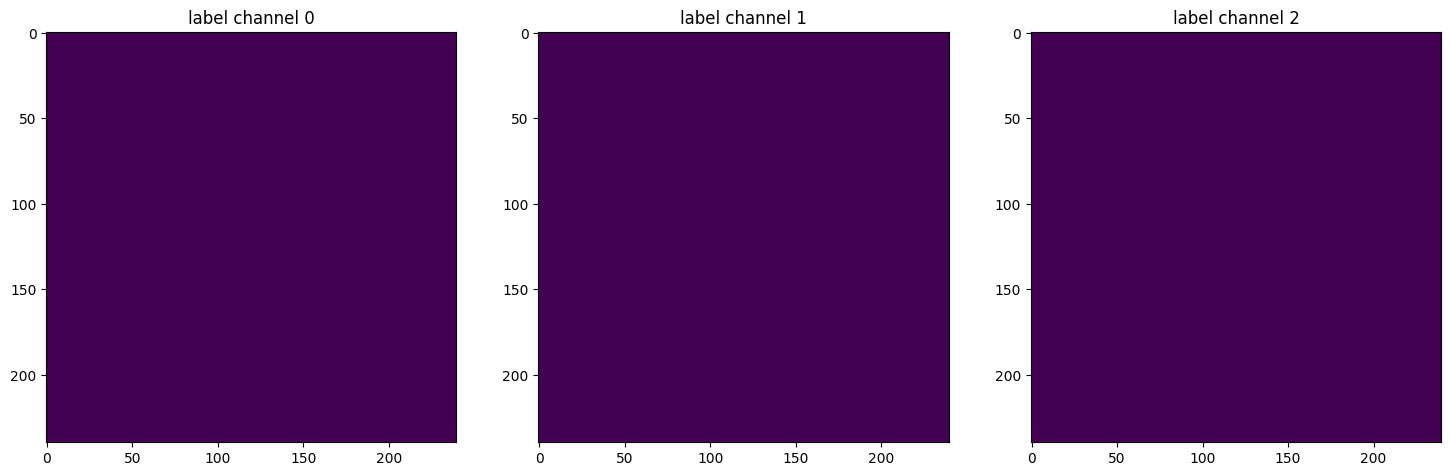

In [5]:
# Image
data = val_dataset[0]['image']
print(data.shape)
plt.figure("image", (24, 6))
for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.title(f"image channel {i}")
        plt.imshow(data[i, :, :, 70].detach().cpu(), cmap="gray")
plt.show()

# Label
label = val_dataset[0]['label']
print(label.shape)
plt.figure("label", (18, 6))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.title(f"label channel {i}")
    plt.imshow(label[i, :, :, 70].detach().cpu())
plt.show()